In [10]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
import cv2

import os
import random

In [12]:
dose = np.load(r"C:\Users\peter\Documents\Thesis\dose_estimator-git\data\data_filtered\numpy\dose_train.npy")
pet = np.load(r"C:\Users\peter\Documents\Thesis\dose_estimator-git\data\data_filtered\numpy\pet_train.npy")
ct = np.load(r"C:\Users\peter\Documents\Thesis\dose_estimator-git\data\data_filtered\numpy\ct_train.npy")

In [13]:
ct.shape

(2592, 128, 128)

In [25]:
for x in range(0, 100):
    #print(pet[x].mean())
    #print(dose[x].mean())
    print(ct_norm[x].min())
    print(ct_norm[x].max())
    print(pet_norm[x].min())
    print(pet_norm[x].max())
    print(dose_norm[x].min())
    print(dose_norm[x].max())
    print(" ")

0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
0.0
0.0
0.0
0.0
0.0
0.0
 
-0.9999690065453408
0.0
0.0
0.0
-0.984375
0.0
 
-0.9999690065453408
0.27841094106154346
0.0
0.0
-1.0
-0.9033203125
 
-0.9999690065453408
0.23380006512536633
0.0
0.0
-1.0
0.3598176489742755
 
-0.9999690065453408
0.1263432106805601
0.0
0.0
-1.0
0.33995441224356887
 
-0.9999690065453408
0.303158580267014
0.0
0.0
-1.0
0.2956691631390427
 
-0.9999690065453408
-0.9628607816930723
0.0
0.0
-1.0
0.357538261152719
 
-0.9999690065453408
0.3174861608596548
0.0
0.0
-1.0
-0.880859375
 
-0.9999690065453408
0.13643764246173884
0.0
0.0
-1.0
0.35688700748941715
 
-0.9999690065453408
0.13220449365027678
0.0
0.0
-1.0
0.299

In [14]:
def normalize_array(inp):
    array = inp.copy()
    for i in range(array.shape[0]):
        pic = array[i,:,:]
        if pic.min() != 0.0:
            mask = (pic < 0.0)
            pic[mask] = pic[mask] / np.abs(pic.min())
        if pic.max() != 0.0:
            mask = (pic > 0.0)
            pic[mask] = pic[mask] / pic.max()
        array[i:(i+1),:,:] = pic
    return array

In [23]:
def normalize_array2(inp):
    array = inp.copy()
    mask1 = (array < 0.0)
    mask2 = (array > 0.0)
    array[mask1] = array[mask1] / np.abs(array.min())
    array[mask2] = array[mask2] / array.max()
    return array

In [15]:
def normalize_dose(inp):
    array = inp.copy()
    for i in range(array.shape[0]):
        pic = array[i,:,:]
        if pic.max() != 0.0:
            pic = 2* (pic / pic.max()) - 1
            array[i:(i+1),:,:] = pic
    return array

In [23]:
def filter_zeros(pet, ct, dose):
    bad_idx = []
    for i in range(pet.shape[0]):
        if np.count_nonzero(pet[i,:,:]) == 0 and np.count_nonzero(ct[i,:,:]) == 0 and np.count_nonzero(dose[i,:,:]) == 0:
            bad_idx.append(i)
    print(len(bad_idx))
    return pet, ct, dose

In [90]:
def upscale_array(array):
    out = np.empty((array.shape[0], 200, 200))
    for i in range(array.shape[0]):
        pic = array[i,:,:]
        out[i,:,:] = cv2.resize(pic, dsize=(200, 200))
    return out

In [17]:
dose_norm = normalize_array(dose)
pet_norm = normalize_array(pet)
ct_norm = normalize_array(ct)

In [24]:
pet_norm, ct_norm, dose_norm = filter_zeros(pet_norm, ct_norm, dose_norm)

568


In [21]:
pet_norm.shape

(2592, 128, 128)

In [158]:
count_pet = 0
count_dose = 0
count_ct = 0
for x in range(ct_norm.shape[0]):
    if np.count_nonzero(pet_norm[x]) == 0:
        count_pet += 1
    if np.count_nonzero(dose_norm[x]) == 0:
        count_dose += 1
    if np.count_nonzero(ct_norm[x]) == 0:
        count_ct += 1

In [160]:
count_ct

0

In [161]:
ct_norm.shape

(2592, 128, 128)

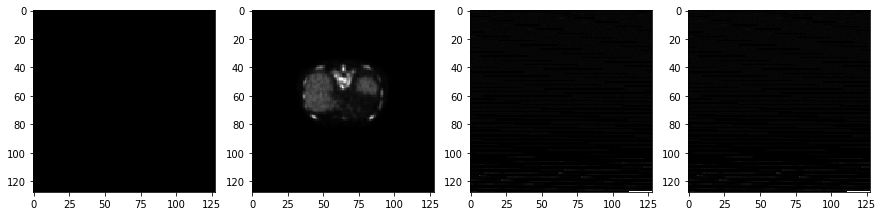

In [162]:
x = 648
fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].imshow(ct[x], cmap="gray")
axes[1].imshow(pet[x], cmap="gray")
axes[2].imshow(dose[x], cmap="gray")
axes[3].imshow(dose_norm[x], cmap="gray")

In [164]:
np.sum(np.isnan(pet_norm))

0